In [1]:
import numpy as np
import math as math 
import pandas as pd
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import calendar
import datetime
from datetime import datetime
import shapefile as shp 
import geopandas as gpd
from sklearn import tree
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import svm, datasets
import sklearn.model_selection as model_selection

###### Read in data

In [2]:
df = pd.read_csv('NYPD_Complaint_All_Clean.csv')
df.head()

,ADDR_PCT_CD,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,OFNS_DESC,LOC_OF_OCCUR_DESC,JURIS_DESC,Latitude,Longitude,NTACode,...,sunrise,sunset,TIME_CAT,INSIDE,TIME,WEEK,DAY,DAY_OF_WEEK,WEEKEND,YEAR
0,46.0,2015-05-28,15:00:00,VIOLATION,HARRASSMENT 2,INSIDE,N.Y. POLICE DEPT,40.845868,-73.915888,BX36,...,05:29:28,20:17:29,AFTERNOON,INSIDE,15,22,28,3,WEEKDAY,2015
1,103.0,2015-05-28,06:40:00,FELONY,BURGLARY,INSIDE,N.Y. POLICE DEPT,40.705442,-73.807102,QN61,...,05:29:28,20:17:29,MORNING AFTER SUNRISE,INSIDE,6,22,28,3,WEEKDAY,2015
2,104.0,2015-05-28,00:01:00,FELONY,GRAND LARCENY,INSIDE,N.Y. POLICE DEPT,40.713100,-73.909310,QN20,...,05:29:28,20:17:29,NIGHT,INSIDE,0,22,28,3,WEEKDAY,2015
3,47.0,2015-05-28,12:00:00,VIOLATION,HARRASSMENT 2,INSIDE,N.Y. POLICE DEPT,40.875762,-73.861321,BX44,...,05:29:28,20:17:29,AFTERNOON,INSIDE,12,22,28,3,WEEKDAY,2015
4,69.0,2015-05-28,13:25:00,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,NaN,N.Y. POLICE DEPT,40.632106,-73.918604,BK50,...,05:29:28,20:17:29,AFTERNOON,OUTSIDE,13,22,28,3,WEEKDAY,2015


In [3]:
df_all = df.copy()

df_all_cat_year_ofs = df_all.groupby(['OFNS_DESC']).size().reset_index(name='counts') #per day

In [4]:
df_all.head()

,ADDR_PCT_CD,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,OFNS_DESC,LOC_OF_OCCUR_DESC,JURIS_DESC,Latitude,Longitude,NTACode,...,sunrise,sunset,TIME_CAT,INSIDE,TIME,WEEK,DAY,DAY_OF_WEEK,WEEKEND,YEAR
0,46.0,2015-05-28,15:00:00,VIOLATION,HARRASSMENT 2,INSIDE,N.Y. POLICE DEPT,40.845868,-73.915888,BX36,...,05:29:28,20:17:29,AFTERNOON,INSIDE,15,22,28,3,WEEKDAY,2015
1,103.0,2015-05-28,06:40:00,FELONY,BURGLARY,INSIDE,N.Y. POLICE DEPT,40.705442,-73.807102,QN61,...,05:29:28,20:17:29,MORNING AFTER SUNRISE,INSIDE,6,22,28,3,WEEKDAY,2015
2,104.0,2015-05-28,00:01:00,FELONY,GRAND LARCENY,INSIDE,N.Y. POLICE DEPT,40.713100,-73.909310,QN20,...,05:29:28,20:17:29,NIGHT,INSIDE,0,22,28,3,WEEKDAY,2015
3,47.0,2015-05-28,12:00:00,VIOLATION,HARRASSMENT 2,INSIDE,N.Y. POLICE DEPT,40.875762,-73.861321,BX44,...,05:29:28,20:17:29,AFTERNOON,INSIDE,12,22,28,3,WEEKDAY,2015
4,69.0,2015-05-28,13:25:00,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,NaN,N.Y. POLICE DEPT,40.632106,-73.918604,BK50,...,05:29:28,20:17:29,AFTERNOON,OUTSIDE,13,22,28,3,WEEKDAY,2015


###### One Hot Encoding for Inside/Outside

In [5]:
inside_dummies = pd.get_dummies(df_all.INSIDE, drop_first=True)
df_all_OHE = pd.concat([df_all, inside_dummies], axis=1)
df_all_OHE.head()

,ADDR_PCT_CD,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,OFNS_DESC,LOC_OF_OCCUR_DESC,JURIS_DESC,Latitude,Longitude,NTACode,...,sunset,TIME_CAT,INSIDE,TIME,WEEK,DAY,DAY_OF_WEEK,WEEKEND,YEAR,OUTSIDE
0,46.0,2015-05-28,15:00:00,VIOLATION,HARRASSMENT 2,INSIDE,N.Y. POLICE DEPT,40.845868,-73.915888,BX36,...,20:17:29,AFTERNOON,INSIDE,15,22,28,3,WEEKDAY,2015,0
1,103.0,2015-05-28,06:40:00,FELONY,BURGLARY,INSIDE,N.Y. POLICE DEPT,40.705442,-73.807102,QN61,...,20:17:29,MORNING AFTER SUNRISE,INSIDE,6,22,28,3,WEEKDAY,2015,0
2,104.0,2015-05-28,00:01:00,FELONY,GRAND LARCENY,INSIDE,N.Y. POLICE DEPT,40.713100,-73.909310,QN20,...,20:17:29,NIGHT,INSIDE,0,22,28,3,WEEKDAY,2015,0
3,47.0,2015-05-28,12:00:00,VIOLATION,HARRASSMENT 2,INSIDE,N.Y. POLICE DEPT,40.875762,-73.861321,BX44,...,20:17:29,AFTERNOON,INSIDE,12,22,28,3,WEEKDAY,2015,0
4,69.0,2015-05-28,13:25:00,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,NaN,N.Y. POLICE DEPT,40.632106,-73.918604,BK50,...,20:17:29,AFTERNOON,OUTSIDE,13,22,28,3,WEEKDAY,2015,1


###### Crime Classification

In [6]:
df_all_OHE.LAW_CAT_CD.value_counts().to_frame()

,LAW_CAT_CD
MISDEMEANOR,3885262
FELONY,2043783
VIOLATION,888335


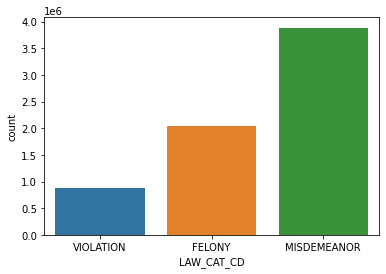

In [7]:
sns.countplot(x='LAW_CAT_CD', data=df_all_OHE);

### Decision Tree Classifier

In [8]:
y = df_all_OHE['LAW_CAT_CD']
X = df_all_OHE[['WEEK','DAY','DAY_OF_WEEK', 'TIME','OUTSIDE',]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier

train_model = DecisionTreeClassifier(random_state = 1,splitter = 'best',max_depth=3)

#fit
train_model.fit(X_train,y_train)

predictions = train_model.predict(X_test)
print(classification_report(y_test, predictions))

/Users/marykrakowski/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      FELONY       0.00      0.00      0.00    407950
 MISDEMEANOR       0.57      1.00      0.73    777553
   VIOLATION       0.00      0.00      0.00    177973

    accuracy                           0.57   1363476
   macro avg       0.19      0.33      0.24   1363476
weighted avg       0.33      0.57      0.41   1363476



#### With Weights

In [9]:
y = df_all_OHE['LAW_CAT_CD']
X = df_all_OHE[['WEEK','DAY','DAY_OF_WEEK', 'TIME','OUTSIDE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier

train_model = DecisionTreeClassifier(random_state = 0,splitter = 'best',class_weight = 'balanced', max_depth=3)

#fit
train_model.fit(X_train,y_train)

predictions = train_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      FELONY       0.35      0.17      0.23    407950
 MISDEMEANOR       0.60      0.45      0.52    777553
   VIOLATION       0.17      0.55      0.25    177973

    accuracy                           0.38   1363476
   macro avg       0.37      0.39      0.33   1363476
weighted avg       0.47      0.38      0.40   1363476



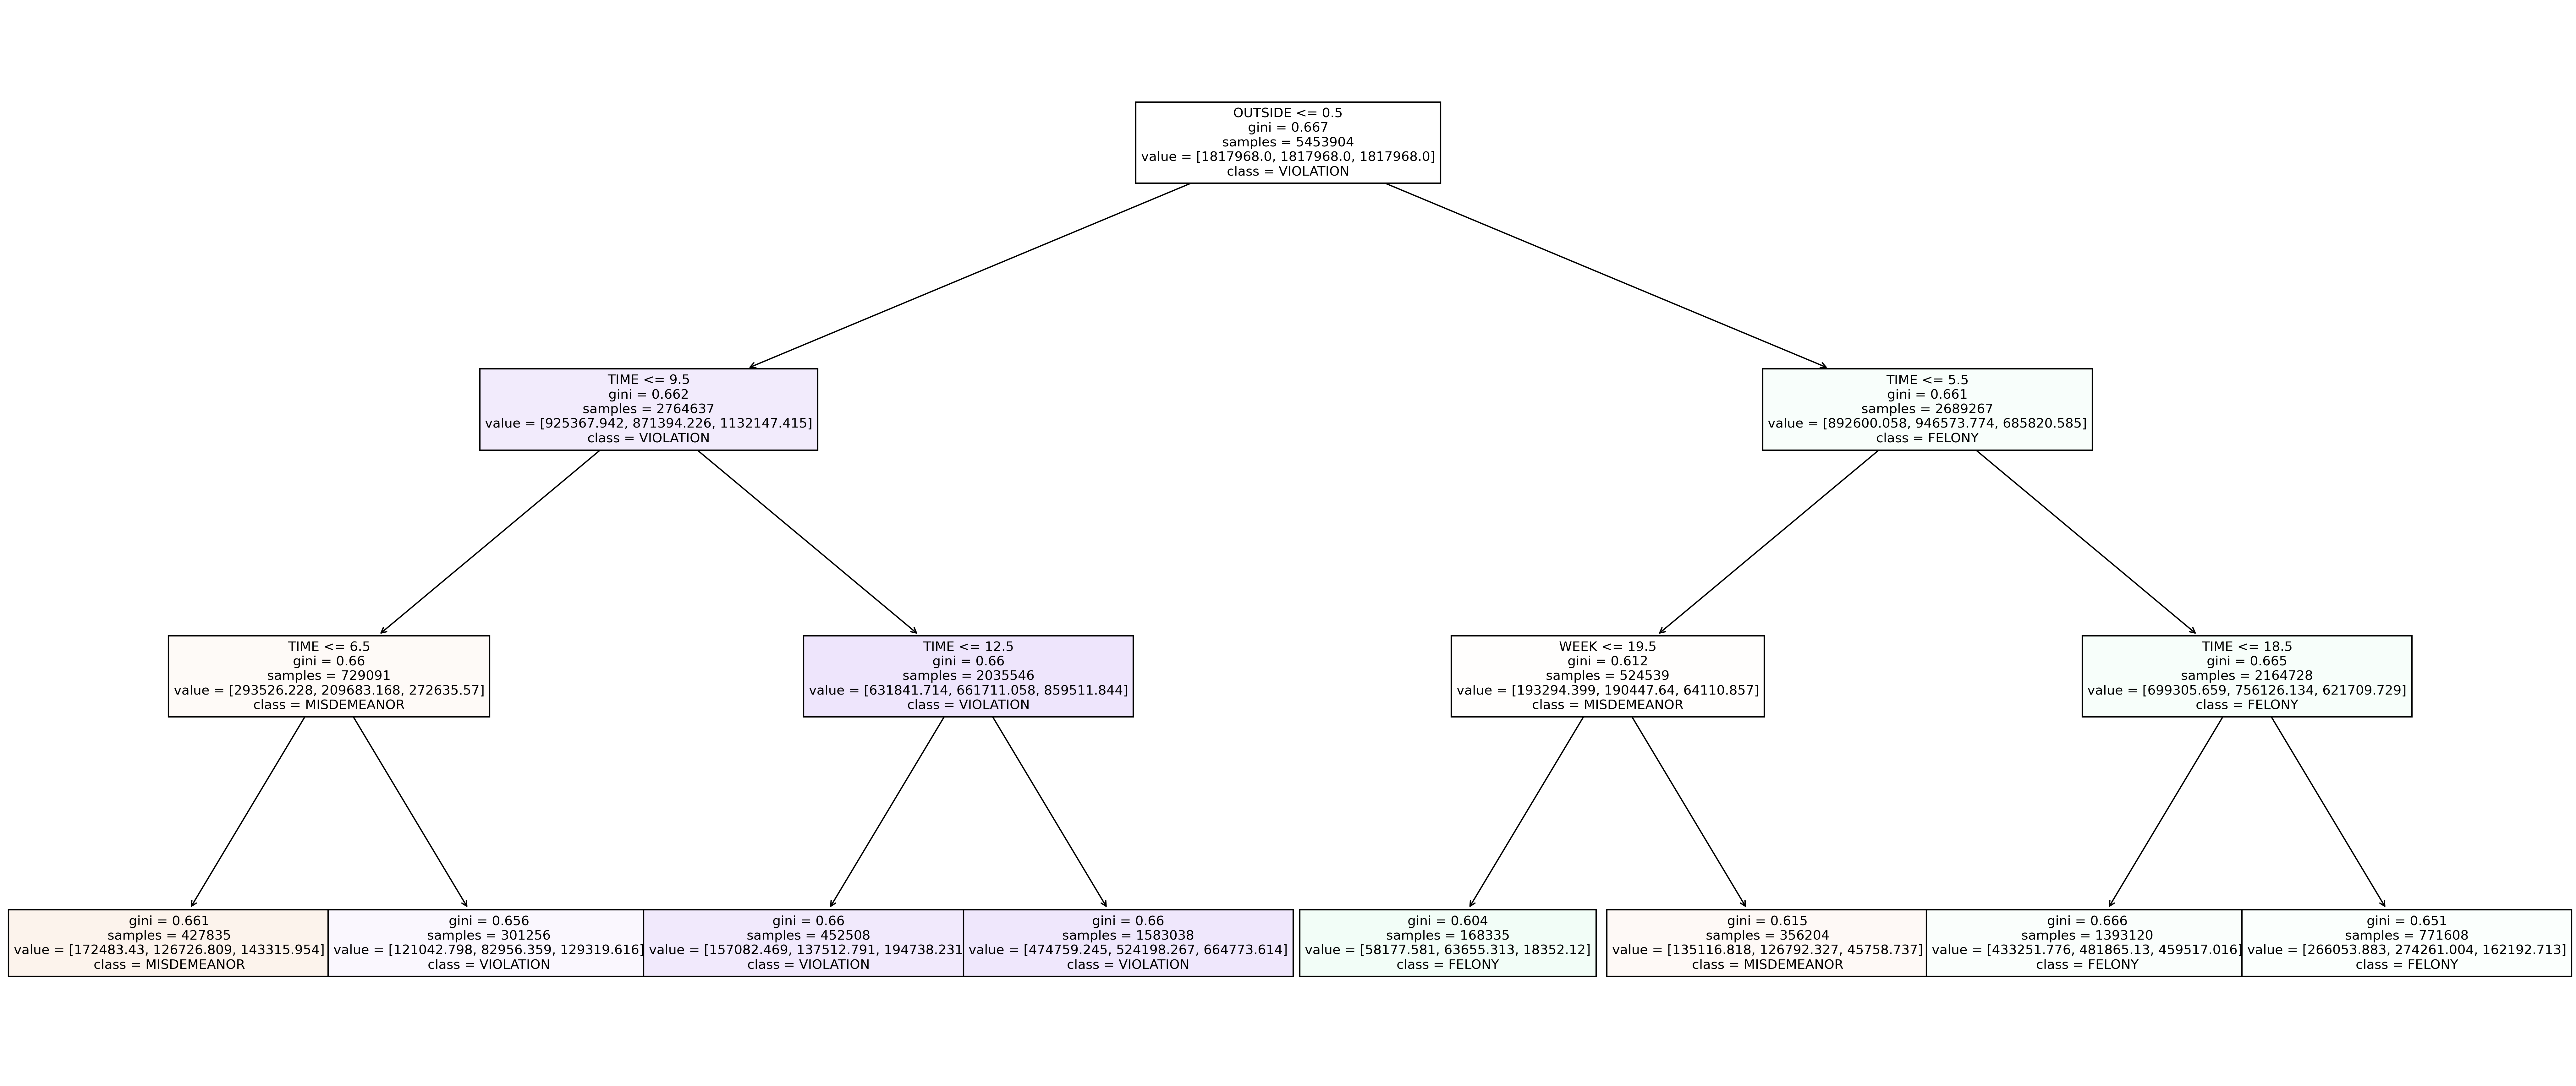

In [10]:
fn=['WEEK','DAY','DAY OF WEEK','TIME','OUTSIDE']
cn=['MISDEMEANOR', 'FELONY', 'VIOLATION']
fig, axes = plt.subplots(figsize = (35,15), squeeze=True, dpi=300)
tree.plot_tree(train_model,
               feature_names = fn, 
               class_names=cn,
               fontsize=10,
               filled = True);


plt.savefig('tree_high_dpi', dpi=100)

##### Offense Type

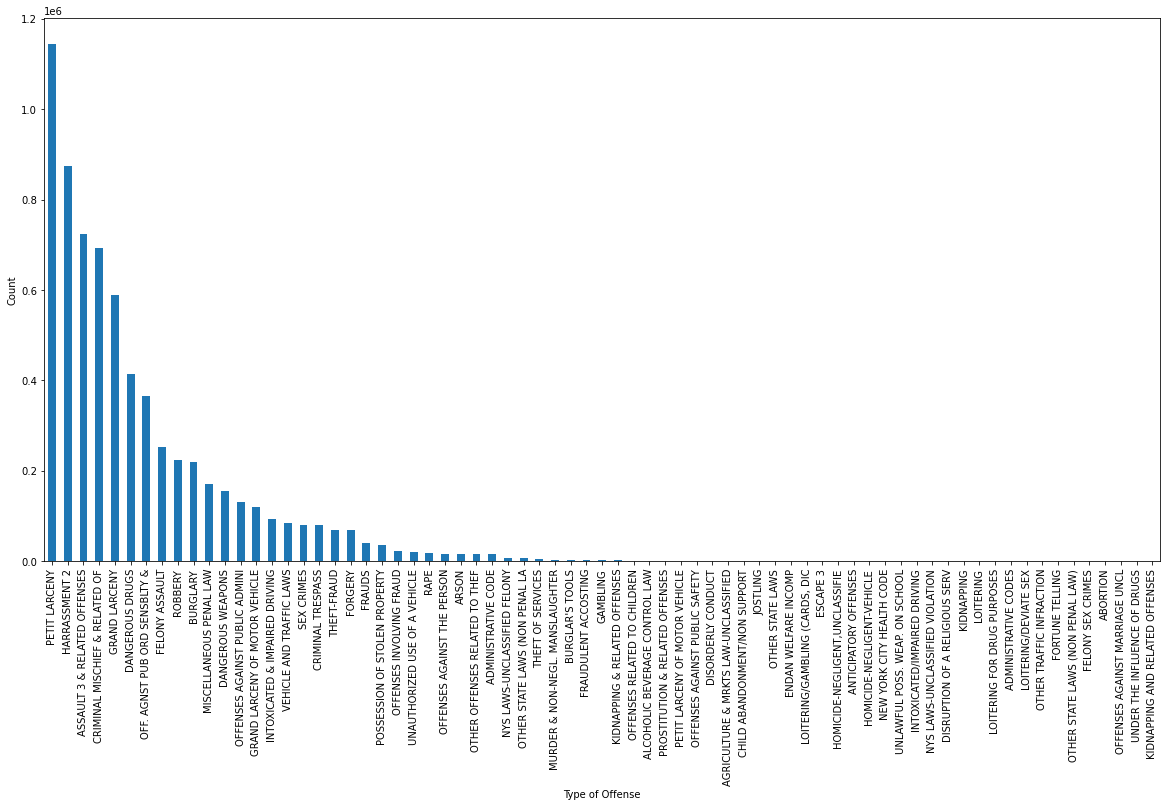

In [11]:
df_all_OHE['OFNS_DESC'].value_counts().plot(kind='bar', figsize=(20,10))
plt.xlabel('Type of Offense')
plt.ylabel('Count')
plt.show()

In [12]:
df_all_OHE.OFNS_DESC.unique()
top_ofs = df_all.groupby(['OFNS_DESC']).size().sort_values(ascending=False).head(16).reset_index()['OFNS_DESC']
top_ofs_list = list(top_ofs.replace(" ", "_"))
print(top_ofs_list)
df_all_top_ofs = df_all_OHE[df_all_OHE['OFNS_DESC'].isin(top_ofs_list)]

['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES', 'CRIMINAL MISCHIEF & RELATED OF', 'GRAND LARCENY', 'DANGEROUS DRUGS', 'OFF. AGNST PUB ORD SENSBLTY &', 'FELONY ASSAULT', 'ROBBERY', 'BURGLARY', 'MISCELLANEOUS PENAL LAW', 'DANGEROUS WEAPONS', 'OFFENSES AGAINST PUBLIC ADMINI', 'GRAND LARCENY OF MOTOR VEHICLE', 'INTOXICATED & IMPAIRED DRIVING', 'VEHICLE AND TRAFFIC LAWS']


###### One Hot Encoding for Top Offense Types

In [13]:
OFNS_dummies = pd.get_dummies(df_all_top_ofs.OFNS_DESC, prefix='OFNS')
df_all_OFNS = pd.concat([df_all_top_ofs, OFNS_dummies], axis=1)
df_all_OFNS.head()

,ADDR_PCT_CD,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,OFNS_DESC,LOC_OF_OCCUR_DESC,JURIS_DESC,Latitude,Longitude,NTACode,...,OFNS_GRAND LARCENY,OFNS_GRAND LARCENY OF MOTOR VEHICLE,OFNS_HARRASSMENT 2,OFNS_INTOXICATED & IMPAIRED DRIVING,OFNS_MISCELLANEOUS PENAL LAW,OFNS_OFF. AGNST PUB ORD SENSBLTY &,OFNS_OFFENSES AGAINST PUBLIC ADMINI,OFNS_PETIT LARCENY,OFNS_ROBBERY,OFNS_VEHICLE AND TRAFFIC LAWS
0,46.0,2015-05-28,15:00:00,VIOLATION,HARRASSMENT 2,INSIDE,N.Y. POLICE DEPT,40.845868,-73.915888,BX36,...,0,0,1,0,0,0,0,0,0,0
1,103.0,2015-05-28,06:40:00,FELONY,BURGLARY,INSIDE,N.Y. POLICE DEPT,40.705442,-73.807102,QN61,...,0,0,0,0,0,0,0,0,0,0
2,104.0,2015-05-28,00:01:00,FELONY,GRAND LARCENY,INSIDE,N.Y. POLICE DEPT,40.713100,-73.909310,QN20,...,1,0,0,0,0,0,0,0,0,0
3,47.0,2015-05-28,12:00:00,VIOLATION,HARRASSMENT 2,INSIDE,N.Y. POLICE DEPT,40.875762,-73.861321,BX44,...,0,0,1,0,0,0,0,0,0,0
4,69.0,2015-05-28,13:25:00,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,NaN,N.Y. POLICE DEPT,40.632106,-73.918604,BK50,...,0,0,0,0,0,0,0,0,0,0


### Decision Tree for Specific Offenses
###### Burglary

In [14]:
B_y = df_all_OFNS['OFNS_BURGLARY']
B_X = df_all_OFNS[['WEEK','DAY','DAY_OF_WEEK', 'TIME','OUTSIDE']]

B_X_train, B_X_test, B_y_train, B_y_test = train_test_split(B_X, B_y, test_size=0.2, random_state=1)

B_train_model = DecisionTreeClassifier(random_state = 1,splitter = 'best',class_weight = 'balanced', max_depth=4)

#fit
B_train_model.fit(B_X_train,B_y_train)

B_pred = B_train_model.predict(B_X_test)
print(B_pred)

B_score = accuracy_score(B_y_test, B_pred)
print("Burglary Accuracy:", B_score)

print(classification_report(B_y_test, B_pred))

[0 1 0 ... 0 0 1]
Burglary Accuracy: 0.5251761197798273
              precision    recall  f1-score   support

           0       0.99      0.51      0.68   1207497
           1       0.06      0.88      0.12     44066

    accuracy                           0.53   1251563
   macro avg       0.53      0.69      0.40   1251563
weighted avg       0.96      0.53      0.66   1251563



###### Dangerous Drugs

In [15]:
DD_y = df_all_OFNS['OFNS_DANGEROUS DRUGS']
DD_X = df_all_OFNS[['WEEK','DAY','DAY_OF_WEEK','TIME','OUTSIDE']]

DD_X_train, DD_X_test, DD_y_train, DD_y_test = train_test_split(DD_X, DD_y, test_size=0.2, random_state=1)

DD_train_model = DecisionTreeClassifier(random_state = 1,splitter = 'best',class_weight = 'balanced', max_depth=14)

#fit
DD_fit = DD_train_model.fit(DD_X_train,DD_y_train)

DD_pred = DD_train_model.predict(DD_X_test)
print(classification_report(DD_y_test, DD_pred))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76   1168520
           1       0.13      0.76      0.22     83043

    accuracy                           0.63   1251563
   macro avg       0.55      0.69      0.49   1251563
weighted avg       0.92      0.63      0.73   1251563



###### Intoxicated and Impaired Driving

In [16]:
IID_y = df_all_OFNS['OFNS_INTOXICATED & IMPAIRED DRIVING']
X = df_all_OFNS[['WEEK','DAY','DAY_OF_WEEK', 'TIME','OUTSIDE']]

IID_X_train, IID_X_test, IID_y_train, IID_y_test = train_test_split(X, IID_y, test_size=0.2, random_state=1)

train_model = DecisionTreeClassifier(random_state = 1,splitter = 'best',class_weight = 'balanced', max_depth=10)

#fit
IID_fit = train_model.fit(IID_X_train,IID_y_train)

IID_pred = train_model.predict(IID_X_test)
print(classification_report(IID_y_test, IID_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1232913
           1       0.07      0.87      0.13     18650

    accuracy                           0.82   1251563
   macro avg       0.53      0.85      0.51   1251563
weighted avg       0.98      0.82      0.89   1251563



###### Seperating Burglary, Dangerous Drugs, and Intoxicated and Impared Driving

In [17]:
df_TYPES = df_all_OFNS[df_all_OFNS['OFNS_DESC'].isin(['BURGLARY', 'DANGEROUS DRUGS', 'INTOXICATED & IMPAIRED DRIVING'])]
df_TYPES.shape

(728486, 39)

###### Classification of Type (Combination of Burglary, Dangerous Drugs, and Intoxicated and Impaired Driving)

In [18]:
Comb_y = df_TYPES['OFNS_DESC']
Comb_X = df_TYPES[['WEEK','DAY','DAY_OF_WEEK', 'TIME','OUTSIDE']]

Comb_X_train, Comb_X_test, Comb_y_train, Comb_y_test = train_test_split(Comb_X, Comb_y, test_size=0.2, random_state=1)

Comb_train_model = DecisionTreeClassifier(random_state = 1,splitter = 'best',class_weight = 'balanced', max_depth=2)

#fit
Comb_train_model.fit(Comb_X_train,Comb_y_train)

Comb_pred = Comb_train_model.predict(Comb_X_test)

Comb_score = accuracy_score(Comb_y_test, Comb_pred)
print("Accuracy:", Comb_score)
f1 = f1_score(Comb_y_test, Comb_pred, average="weighted")
print("F1_score:", f1)
precision = precision_score(Comb_y_test, Comb_pred, average="weighted")
print("Precision:", precision)
recall = recall_score(Comb_y_test, Comb_pred, average="weighted")
print("Recall:", recall)
print(classification_report(Comb_y_test, Comb_pred))

Accuracy: 0.7508407802440665
F1_score: 0.7531524629593945
Precision: 0.7754419083302965
Recall: 0.7508407802440665
                                precision    recall  f1-score   support

                      BURGLARY       0.71      0.88      0.78     43840
               DANGEROUS DRUGS       0.86      0.69      0.76     83234
INTOXICATED & IMPAIRED DRIVING       0.55      0.73      0.63     18624

                      accuracy                           0.75    145698
                     macro avg       0.71      0.77      0.73    145698
                  weighted avg       0.78      0.75      0.75    145698



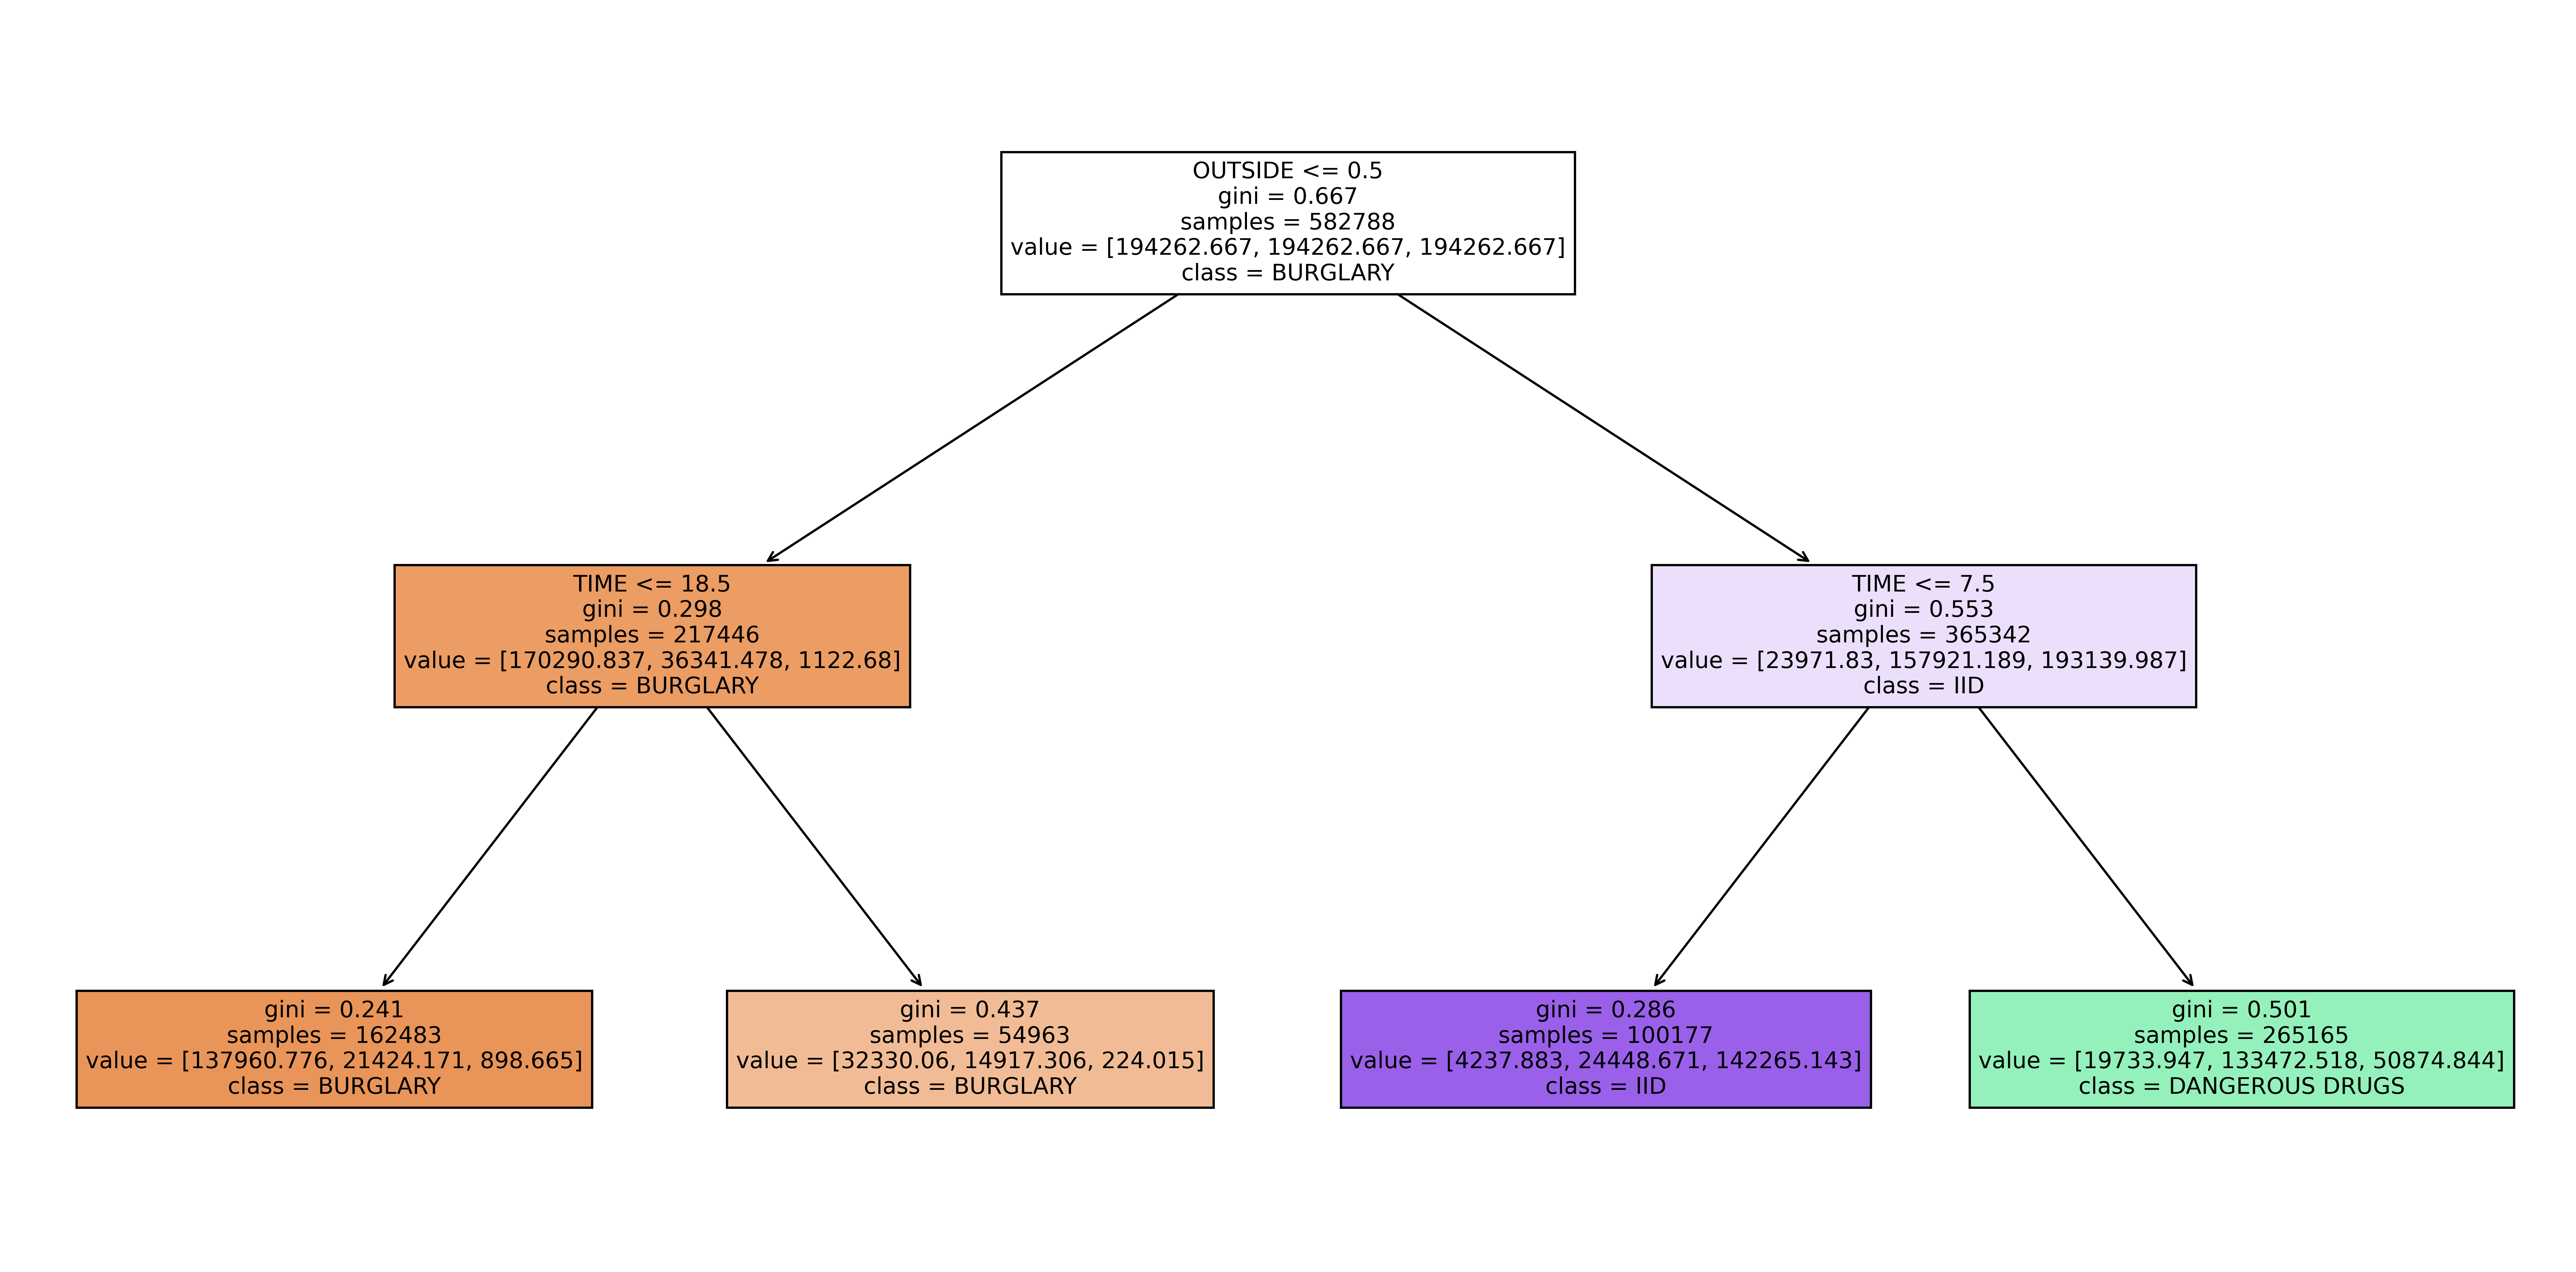

In [20]:
fn1=['WEEK','DAY','DAY OF WEEK','TIME', 'OUTSIDE']
cn1=['BURGLARY', 'DANGEROUS DRUGS', 'IID']
fig, axes = plt.subplots(figsize = (20,10), squeeze=True, dpi=500)
tree.plot_tree(Comb_train_model,
               feature_names = fn1, 
               class_names=cn1,
               fontsize=10,
               filled = True);


plt.savefig('tree_plot.png')  

### Support Vector Machine
###### Crime Type

In [21]:
svm_y = df_TYPES['OFNS_DESC']
svm_X = df_TYPES[['WEEK','DAY','DAY_OF_WEEK', 'TIME','OUTSIDE']]

Hsvm_y=svm_y.head(20000)
Hsvm_X=svm_X.head(20000)

HX_train, HX_test, Hy_train, Hy_test = train_test_split(Hsvm_X, Hsvm_y, test_size=0.1, random_state=1)


svm_linear = SVC(kernel = 'linear', C = 1,class_weight = 'balanced')
svm_linear.fit(HX_train, Hy_train)
Hsvm_pred = svm_linear.predict(HX_test)

In [22]:
H_score = accuracy_score(Hy_test, Hsvm_pred)
print("Accuracy:", H_score)
f1 = f1_score(Hy_test, Hsvm_pred, average="weighted")
print("F1_score:", f1)
precision = precision_score(Hy_test, Hsvm_pred, average="weighted")
print("Precision:", precision)
recall = recall_score(Hy_test, Hsvm_pred, average="weighted")
print("Recall:", recall)
print(classification_report(Hy_test, Hsvm_pred))

Accuracy: 0.728
F1_score: 0.731314627878423
Precision: 0.7688734661019447
Recall: 0.728
                                precision    recall  f1-score   support

                      BURGLARY       0.69      0.87      0.77       569
               DANGEROUS DRUGS       0.87      0.64      0.74      1144
INTOXICATED & IMPAIRED DRIVING       0.51      0.79      0.62       287

                      accuracy                           0.73      2000
                     macro avg       0.69      0.77      0.71      2000
                  weighted avg       0.77      0.73      0.73      2000

